# Spam/ham classification

In this assignment you will train a classifier to recognise spam emails. The data was taken from this [enron spam](https://www.kaggle.com/wanderfj/enron-spam)  kaggle dataset. The dataset is described [here](https://www.researchgate.net/publication/221650814_Spam_Filtering_with_Naive_Bayes_-_Which_Naive_Bayes). This will familiarize you with tools  for text analysis  from  the scikit-learn library. 

The data is provided as a zip archive "enron_spam.zip". You can unpack it with command `unzip enron_spam.zip` which will create a directory `data`. 

The data  consists of 6 batches of emails. Each batch corresponds to different person and different spam source. Each batch is stored in different subdirectory of `data` named `Enron_1` to `Enron_6`. Each email is stored in separate file :( Spam and ham emails are stored in different subdirectories. Fortunatelly the scikit-learn library provides a functiona `load_files` that can read data in this format. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import clone


In [3]:
# Class for printing in bold font
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

In [4]:
from sklearn.datasets import load_files

You can load data from given batch using the function

In [5]:
data1 = load_files('data/Enron_1/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )

It returns a python dictionary. The entry 'data' contains the data from files and the entry 'target' contains the labels assigned according to the subdirectory names. The labels are integers and corresponding names can be found in the entry 'target_names'.

In [6]:
len(data1['data'])

4137

In [7]:
data1['data'][:2]

["Subject: re : cornhusker deal\r\nrita ,\r\nthings have been changing daily on this thing , so we were waiting to get it\r\nall figured out .\r\ni did tell mark mccoy to handle this , and he is going to get you all the\r\ninformation right after\r\nthe long weekend . hope this helps . pat\r\nrita wynne @ ect\r\n08 / 31 / 2000 05 : 25 pm\r\nto : pat clynes / corp / enron @ enron , daren j farmer / hou / ect @ ect\r\ncc :\r\nsubject : cornhusker deal\r\nhey guys ,\r\ni need to be bought up to speed on the cornhusker deal . i don ' t know what\r\nthe impact is to my group or what we should expect to see in terms of\r\nallocations or settlements . any info . either of you can provide would be\r\nappreciated . thanks and have a great holiday !",
 'Subject: enron / hpl actuals for sept . 18 , 2000\r\nls hpl lsk ic 2 . 500 / enron']

In [8]:
len(data1['target'])

4137

In [9]:
data1['target'][:2]

array([0, 0])

In [10]:
data1['target_names']

['ham', 'spam']

## Problems 

1. Train the multinomial bayes classifier using scikit-learn  for the first batch of data in data/Enron_1 as described in text_analysis notebook.
    1. Set asside 20% of data for testings and train the multinomial bayes classifier using the remaining 80% of data.This requires  transforming the data to feature vectors using CountVectoriser  from scikit-learn. How big is the resulting vocabulary ? 
    1. Using the test set 
        1. Draw the confusion matrix using `plot_confusion_matrix` from scikit-learn (see the latest update of the text_analysis notebook) using the test set. 
        1. Calculate recall and precision scores. 
        1. Draw the ROC curve and calculate the AUC score  using the test set. 
        1. What percentage of valid mails is classified as spam?
        1. Assuming that only mails classified as ham are put in our mailbox what percentage of mail in our inbox is spam?
        
    1. Find ten most probable and least probable words for each class.     
    1. Check the classifier on the remaining datasets data/Enron_2-6. For each set calculate recall and precision. 
    1. Combine all sets.  Train a new classifier on the combined  set, of course after dividing into test and train sets. Redo point B. using this classifier and combined test set. 
    1. Assumimg that we want to keep the frequency of misclassified ham mails belowe 5 per mile, what would be the percentage of spam in our inbox?
   

__Hint__ You can create a dataframe from the data using

# Exercise 1:
# Train the multinomial bayes classifier using scikit-learn for the first batch of data in data/Enron_1 as described in text_analysis notebook.

# Exercise 1A
# Set asside 20% of data for testings and train the multinomial bayes classifier using the remaining 80% of data.This requires transforming the data to feature vectors using CountVectoriser from scikit-learn. How big is the resulting vocabulary ? 

In [11]:
import pandas as pd
df1 = pd.DataFrame({'text': data1['data'], 'spam': data1['target']})

In [12]:
df1.spam.value_counts()

0    2937
1    1200
Name: spam, dtype: int64

### 

In [13]:
df1.head()

,text,spam
0,"Subject: re : cornhusker deal\r\nrita ,\r\nthi...",0
1,"Subject: enron / hpl actuals for sept . 18 , 2...",0
2,Subject: fw : teco / frontera financial trades...,0
3,Subject: jan . 01 sale to texas general land o...,0
4,Subject: re : volume increase - hpl meter 68 -...,0


In [14]:
len(df1)

4137

In [15]:
#train_test_split(df1, test_size=0.33, random_state=42)

seed = 57576
train_data, test_data = train_test_split(df1,test_size=0.2, stratify=df1['spam'], random_state = seed)

In [16]:
print("Training data length =",len(train_data),"which equals to:",len(train_data)/len(df1),"% of all data")
print("Testing data length =",len(test_data),"which equals to:",len(test_data)/len(df1),"% of all data")

Training data length = 3309 which equals to: 0.7998549673676577 % of all data
Testing data length = 828 which equals to: 0.2001450326323423 % of all data


In [17]:
print("Training dataset:")
print(train_data.spam.value_counts(),"\n")
print("Testing dataset:")
print(test_data.spam.value_counts(),"\n")

Training dataset:
0    2349
1     960
Name: spam, dtype: int64 

Testing dataset:
0    588
1    240
Name: spam, dtype: int64 



In [18]:
# Initializing vectorizer

vectorizer = CountVectorizer(stop_words='english')

In [19]:
# Fitting nad transforming train_data

# %%time
spam_features = vectorizer.fit_transform(train_data.text)

In [20]:
# Exercise 1A
# Dimensions of vocabulary:
print(style.BOLD + "Exercise 1A:" + style.END)

print("--> Number of documents in dataset =",spam_features.shape[0])
print("--> Number of words in vocabulary =",spam_features.shape[1])

Exercise 1A:
--> Number of documents in dataset = 3309
--> Number of words in vocabulary = 37931


# Exercise 1Ba
# Draw the confusion matrix using plot_confusion_matrix from scikit-learn (see the latest update of the text_analysis notebook) using the test set. 

In [21]:
print("Number of non-zero elements in first 5 documents:")
print(np.count_nonzero(spam_features[:5,:].toarray(), axis = 1))

Number of non-zero elements in first 5 documents:
[30 87 61 49 19]


In [22]:
# Initializing MultinomialNB classifier

base_spam_classifier = MultinomialNB()

In [23]:
# Fitting classfier to training data

base_spam_classifier.fit(spam_features, train_data.spam)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
# Applying trained classfier to test_data

# %%time
test_features = vectorizer.transform(test_data.text)

In [25]:
# Calculating score of the classifier

print("Score of MultinomialNB classifier =",base_spam_classifier.score(test_features, test_data.spam))

Score of MultinomialNB classifier = 0.9794685990338164


In [26]:
# Calculating predictions made by classfier

base_predicted =  base_spam_classifier.predict(test_features)

In [27]:
# Confusion matrix calculation

outcome_freq = confusion_matrix(test_data.spam, base_predicted, normalize='all')

print("Confusion matrix (normalised) in array form:\n")
print(outcome_freq)

Confusion matrix (normalised) in array form:

[[0.70048309 0.00966184]
 [0.01086957 0.27898551]]


Exercise 1Ba:
--> Plotting confusion matrix:



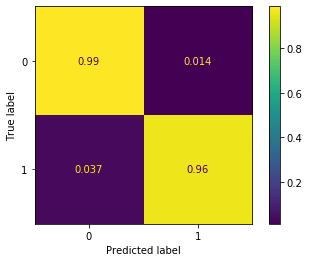

In [28]:
# Exercise 1Ba
# Confusion matrix plot

print(style.BOLD + "Exercise 1Ba:" + style.END)
print("--> Plotting confusion matrix:\n")
fig, ax = plt.subplots(figsize=(6,4))
disp = plot_confusion_matrix(base_spam_classifier, test_features, test_data.spam, normalize='true', ax=ax);

# Exercise 1Bb
# Calculate recall and precision scores.

In [29]:
# Calculating score of predictions made by classifier

print("Accuracy of MultinomialNB classifier =",accuracy_score(test_data.spam, base_predicted))

Accuracy of MultinomialNB classifier = 0.9794685990338164


In [30]:
# Exercise 1Bb
# Recall Score

print(style.BOLD + "Exercise 1Bb:" + style.END)
print("--> Recall score =",recall_score(test_data.spam, base_predicted, average='macro'))

Exercise 1Bb:
--> Recall score = 0.9744472789115646


In [31]:
# Exercise 1Bb
# Precision Score

print(style.BOLD + "Exercise 1Bb:" + style.END)
print("--> Precision score =",precision_score(test_data.spam, base_predicted, average='macro'))

Exercise 1Bb:
--> Precision score = 0.975623530414645


In [32]:
# Exercise 1Bb
# F1 Score

print(style.BOLD + "Exercise 1Bb:" + style.END)
print("--> F1 score =",f1_score(test_data.spam, base_predicted, average='macro'))

Exercise 1Bb:
--> F1 score = 0.9750329470736081


# Exercise 1Bc
# Draw the ROC curve and calculate the AUC score using the test set.

In [33]:
# Probabilities prediction

base_predicted_probabilities =  base_spam_classifier.predict_proba(test_features)
#print("Dimensions of probabilities prediction:",base_predicted_probabilities.shape,"\n")
#print("First 5 rows of probabilities prediction:",base_predicted_probabilities[:5, :],"\n)

In [34]:
# Priting predicted probabilities and test labels to choose proper columns for further analysis

print(base_predicted_probabilities[:5, 1])
print(test_data.spam[:5])

[9.91594891e-215 3.79884477e-111 3.99576232e-012 1.00000000e+000
 3.80746568e-087]
405     0
3122    0
729     0
546     1
1940    0
Name: spam, dtype: int32


In [35]:
# Roc curve function

fpr_base, tpr_base, ths_base = roc_curve(test_data.spam, base_predicted_probabilities[:,1]);

Exercise 1Bc:
--> ROC curve for MultinomialNB classifier:


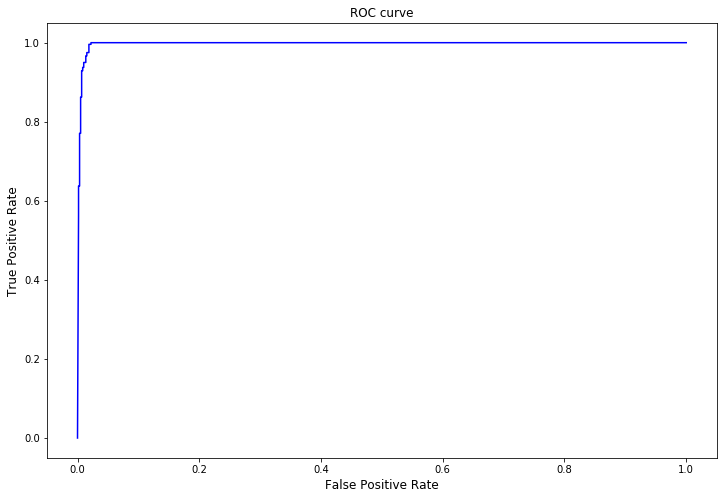

In [36]:
# Exercise 1Bc
# Roc curve drawing

print(style.BOLD + "Exercise 1Bc:" + style.END)
print("--> ROC curve for MultinomialNB classifier:")

fig1 = plt.figure(figsize=(12,8))

ax1 = fig1.add_subplot(111)
ax1.set_title("ROC curve")
ax1.set_xlabel("False Positive Rate",fontsize=12)
ax1.set_ylabel("True Positive Rate",fontsize=12)

ax1.plot(fpr_base, tpr_base,color="blue")

plt.show()

In [37]:
# Exercise 1Bc
# AUC score

base_AUC = roc_auc_score(test_data.spam, base_predicted_probabilities[:,1])

print(style.BOLD + "Exercise 1Bc:" + style.END)
print("--> AUC score for MultinomialNB classfier =",base_AUC)

Exercise 1Bc:
--> AUC score for MultinomialNB classfier = 0.996984835600907


# Exercise 1Bd
# What percentage of valid mails is classified as spam?

In [38]:
# Exercise 1Bd
# Percentage of ham mails identified as spam

ham_as_spam_counts = np.count_nonzero(base_predicted[np.where(test_data.spam==0)]==1)
ham_counts = len(base_predicted[np.where(test_data.spam==0)])

print(style.BOLD + "Exercise 1Bd:" + style.END)
print("Percentage of ham mails identified as spam : {0:.2%}".format(ham_as_spam_counts/ham_counts))

Exercise 1Bd:
Percentage of ham mails identified as spam : 1.36%


# Exercise 1Be
# Assuming that only mails classified as ham are put in our mailbox what percentage of mail in our inbox is spam?

In [39]:
# Exercise 1Be
# Percentage of spam mails in our mailbox (in set identified as ham)

spam_as_ham_counts = np.count_nonzero(base_predicted[np.where(test_data.spam==1)]==0)
identified_as_ham_counts = np.count_nonzero(base_predicted==0)
print(style.BOLD + "Exercise 1Be:" + style.END)
print("--> Percentage of spam mails in our mailbox: {0:.2%}".format(spam_as_ham_counts/identified_as_ham_counts))

Exercise 1Be:
--> Percentage of spam mails in our mailbox: 1.53%


# Exercise 1C
# Find ten most probable and least probable words for each class.

In [40]:
# Function for converting indices to words

def word(i):
    return vectorizer.get_feature_names()[i]

In [41]:
# Finding 10 most probable and words in both sets

n = 10

word = np.vectorize(word)

most_probable = np.argsort(base_spam_classifier.feature_log_prob_,axis=1)[:,-1:-n-1:-1]
most_probable_words = word(most_probable)

print(style.BOLD + "Exercise 1C:" + style.END)
print("--> 10 most probable words in ham and spam mails:")
pd.DataFrame(most_probable_words, index = ["ham","spam"], columns=range(1,11))

Exercise 1C:
--> 10 most probable words in ham and spam mails:


,1,2,3,4,5,6,7,8,9,10
ham,ect,hou,subject,enron,2000,gas,deal,meter,hpl,cc
spam,subject,com,http,company,font,td,www,00,information,statements


In [42]:
# Finding 10 least probable and words in both sets

least_probable = np.argsort(base_spam_classifier.feature_log_prob_,axis=1)[:,:n]
least_probable_words = word(least_probable)

print(style.BOLD + "Exercise 1C:" + style.END)
print("--> 10 least probable words in ham and spam mails:")
pd.DataFrame(least_probable_words, index = ["ham","spam"], columns=range(1,11))

Exercise 1C:
--> 10 least probable words in ham and spam mails:


,1,2,3,4,5,6,7,8,9,10
ham,hyb,lunatics,lunary,lunar,lunacy,lumpish,lummox,luminosity,luminescent,luminance
spam,replacement,loring,lorio,bolt,loses,bombeck,feeding,feedbacks,bonaire,sixth


# Exercise 1D
# Check the classifier on the remaining datasets data/Enron_2-6. For each set calculate recall and precision.

In [43]:
# Loading remaining datasets

data2 = load_files('data/Enron_2/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )
data3 = load_files('data/Enron_3/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )
data4 = load_files('data/Enron_4/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )
data5 = load_files('data/Enron_5/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )
data6 = load_files('data/Enron_6/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )

In [44]:
# Datasets to dataframes

df2 = pd.DataFrame({'text': data2['data'], 'spam': data2['target']})
df3 = pd.DataFrame({'text': data3['data'], 'spam': data3['target']})
df4 = pd.DataFrame({'text': data4['data'], 'spam': data4['target']})
df5 = pd.DataFrame({'text': data5['data'], 'spam': data5['target']})
df6 = pd.DataFrame({'text': data6['data'], 'spam': data6['target']})

In [45]:
# List of dataframes

dfi=[df2, df3, df4, df5, df6]

In [46]:
# Exercise 1D
# Precision Score and Recall Score on remaining datasets

print(style.BOLD + "Exercise 1D:" + style.END,"\n")
for i in range(5):
    base_predicted_i = base_spam_classifier.predict(vectorizer.transform(dfi[i].text))
    print(style.BOLD + "Dataset nr. {}:".format(i+2) + style.END)
    print("--> Precision score =",precision_score(dfi[i].spam, base_predicted_i, average='macro'))
    print("--> Recall score =",recall_score(dfi[i].spam, base_predicted_i, average='macro'))
    print("--> F1 score =",f1_score(dfi[i].spam, base_predicted_i, average='macro'),"\n")


Exercise 1D: 

Dataset nr. 2:
--> Precision score = 0.9085812893699179
--> Recall score = 0.9431016139354502
--> F1 score = 0.9236795613069015 

Dataset nr. 3:
--> Precision score = 0.9500057060491564
--> Recall score = 0.9710417315882414
--> F1 score = 0.9597455144719241 

Dataset nr. 4:
--> Precision score = 0.9279634710758599
--> Recall score = 0.9427719505418172
--> F1 score = 0.9350238614063258 

Dataset nr. 5:
--> Precision score = 0.9408132735954624
--> Recall score = 0.9680697278911565
--> F1 score = 0.9528214326511604 

Dataset nr. 6:
--> Precision score = 0.9515917046161199
--> Recall score = 0.9619444444444445
--> F1 score = 0.9566128652465617 



# Exercise 1E
# Combine all sets. Train a new classifier on the combined set, of course after dividing into test and train sets. Redo point B. using this classifier and combined test set.

In [47]:
# Exercise 1E
# Merging all datasets into one

dlist=[df1, df2, df3, df4, df5, df6]
df_all = pd.concat(dlist)

In [48]:
seed = 57576
train_data_all, test_data_all = train_test_split(df_all, test_size=0.2, stratify=df_all['spam'], random_state = seed)

In [49]:
# Vectorizer initialization, fit and transform

vectorizer_all = CountVectorizer()
train_spam_score_all = vectorizer_all.fit_transform(train_data_all.text)
test_spam_score_all = vectorizer_all.transform(test_data_all.text)

# MultinomialNB classfier

base_spam_classifier_all = MultinomialNB()
base_spam_classifier_all.fit(train_spam_score_all, train_data_all.spam)

# Predictions

base_predicted_all = base_spam_classifier_all.predict(test_spam_score_all)
base_predicted_probabilities_all = base_spam_classifier_all.predict_proba(test_spam_score_all)

In [50]:
# Exercise 1E
# Dimensions of vocabulary:
print(style.BOLD + "Exercise 2E:" + style.END)
print("--> Number of documents in dataset =",train_spam_score_all.shape[0])
print("--> Number of words in vocabulary =",train_spam_score_all.shape[1])

Exercise 2E:
--> Number of documents in dataset = 21576
--> Number of words in vocabulary = 127932


In [51]:
# Confusion matrix calculation

outcome_freq = confusion_matrix(test_data_all.spam, base_predicted_all, normalize='all')

print("Confusion matrix (normalised) in array form:\n")
print(outcome_freq)

Confusion matrix (normalised) in array form:

[[0.48368558 0.00704486]
 [0.00760104 0.50166852]]


Exercise 1E:
--> Plotting confusion matrix:



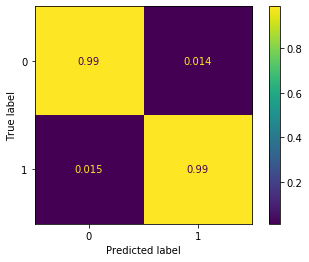

In [52]:
# Exercise 1E
# Confusion matrix plot

print(style.BOLD + "Exercise 1E:" + style.END)
print("--> Plotting confusion matrix:\n")
fig, ax = plt.subplots(figsize=(6,4))
disp = plot_confusion_matrix(base_spam_classifier_all, test_spam_score_all, test_data_all.spam, normalize='true', ax=ax);

In [53]:
# Exercise 1E
# Recall Score

print(style.BOLD + "Exercise 1E:" + style.END)
print("--> Precision score =",precision_score(test_data_all.spam, base_predicted_all, average='macro'))
print("--> Recall score =",recall_score(test_data_all.spam, base_predicted_all, average='macro'))
print("--> F1 score =",f1_score(test_data_all.spam, base_predicted_all, average='macro'))

Exercise 1E:
--> Precision score = 0.9853399526926674
--> Recall score = 0.9853593761453405
--> F1 score = 0.985349359328858


Exercise 1E:
--> ROC curve for MultinomialNB classifier (all datasets):


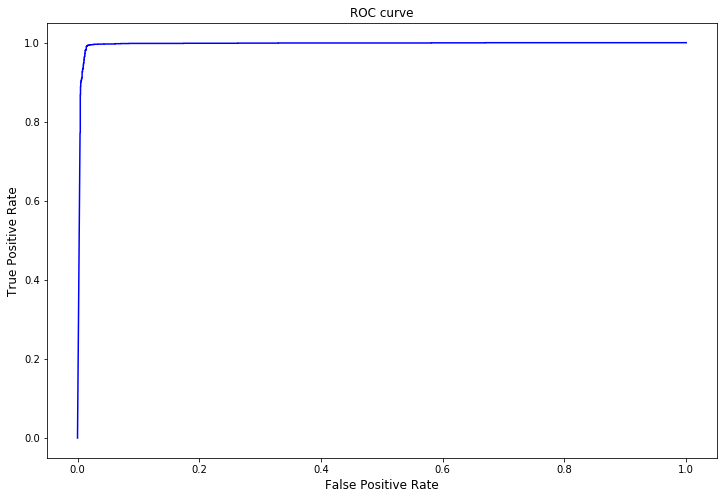

In [54]:
# Exercise 1E
# Roc curve calculating and drawing

fpr_all, tpr_all, ths_all = roc_curve(test_data_all.spam, base_predicted_probabilities_all[:,1]);

print(style.BOLD + "Exercise 1E:" + style.END)
print("--> ROC curve for MultinomialNB classifier (all datasets):")

fig1 = plt.figure(figsize=(12,8))

ax1 = fig1.add_subplot(111)
ax1.set_title("ROC curve")
ax1.set_xlabel("False Positive Rate",fontsize=12)
ax1.set_ylabel("True Positive Rate",fontsize=12)

ax1.plot(fpr_all, tpr_all,color="blue")

plt.show()

In [55]:
# Exercise 1E
# AUC score

all_AUC = roc_auc_score(test_data_all.spam, base_predicted_probabilities_all[:,1])

print(style.BOLD + "Exercise 1E:" + style.END)
print("--> AUC score for MultinomialNB classfier =",all_AUC)

Exercise 1E:
--> AUC score for MultinomialNB classfier = 0.9958662876244154


In [56]:
# Exercise 1E
# Percentage of ham mails identified as spam

ham_as_spam_counts_all = np.count_nonzero(base_predicted_all[np.where(test_data_all.spam == 0)] == 1)
ham_counts_all = len(base_predicted_all[np.where(test_data_all.spam == 0)])

print(style.BOLD + "Exercise 1E:" + style.END)
print("--> Percentage of ham mails identified as spam : {0:.2%}".format(ham_as_spam_counts_all/ham_counts_all))

Exercise 1E:
--> Percentage of ham mails identified as spam : 1.44%


In [57]:
# Exercise 1E
# Percentage of spam mails in our mailbox (in set identified as ham)

spam_as_ham_counts_all = np.count_nonzero(base_predicted_all[np.where(test_data_all.spam == 1)] == 0)
identified_as_ham_counts_all = np.count_nonzero(base_predicted_all == 0)

print(style.BOLD + "Exercise 1E:" + style.END)
print("--> Percentage of spam mails in our mailbox: {0:.2%}".format(spam_as_ham_counts_all/identified_as_ham_counts_all))

Exercise 1E:
--> Percentage of spam mails in our mailbox: 1.55%


# Exercise 1F
# Assumimg that we want to keep the frequency of misclassified ham mails below 5 per file, what would be the percentage of spam in our inbox?